PROJECT NAME - UBER SUPPLY DEMAND GAP
Project Type - EDA
Contribution - Individual

PROJECT SUMMARY:
Cab Unvailability and Cancellation Analysis

This data analytics project focused on identifying the root causes behind cab unavailability and frequent cancellations during nighttime and early morning hours (10 PM to 6 AM). The goal was to provide actionable insights to improve service reliability during these off-peak periods.

The dataset was first cleaned and preprocessed using Excel, ensuring data accuracy and consistency. SQL was used to query and manipulate data stored in relational databases. Exploratory Data Analysis (EDA) was conducted using Python, leveraging libraries such as Pandas, Matplotlib, and Seaborn to uncover key patterns and correlations. Final results were presented through Excel dashboards to enable easy interpretation by stakeholders.

Key findings included:

A high rate of cancellations and no-shows occurred during late night and early morning hours.

The primary cause was driver unavailability, especially for long-distance or airport trips.

These insights led to recommendations such as dynamic driver incentives, better route and shift planning, and real-time monitoring to address supply gaps during critical hours.

GitHub Link: https://github.com/JanakiRavichandran/Uber_request


Problem Statement:
Uber services are experiencing a high rate of cancellations and unavailability during late-night and early morning hours (10 PM to 6 AM), leading to poor customer experience and potential revenue loss. This issue appears to be influenced by factors such as driver availability, demand-supply mismatch, and trip location patterns. A data-driven approach is needed to identify the root causes of these disruptions and provide actionable insights to improve service reliability during off-peak hours.




In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Uploading Dataset
from google.colab import files
uploaded = files.upload()

Saving Uber_request_data.csv to Uber_request_data (1).csv


In [ ]:
#Loading Dataset
df=pd.read_csv('Uber_request_data.csv')

In [ ]:
#Dataset First Look
df

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Request_Date,Request_Time,Drop_timestamp,Drop_Date,Drop_Time,Duration,Time_of_Day
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016,11:51:00,11/7/2016 13:00,11/7/2016,13:00:00,1:09:00,Morning
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016,17:57:00,11/7/2016 18:47,11/7/2016,18:47:00,0:50:00,Afternoon
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016,9:17:00,12/7/2016 9:58,12/7/2016,9:58:00,0:41:00,Morning
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016,21:08:00,12/7/2016 22:03,12/7/2016,22:03:00,0:55:00,Night
4,3112,City,1,Trip Completed,13/07/2016 08:33:16,7/13/2016,8:33:16,13/07/2016 09:25:47,7/13/2016,9:25:47,0:52:31,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,Missing,No Cars Available,15/07/2016 23:49:03,7/15/2016,23:49:03,NaN,NaN,NaN,NaN,Night
6741,6752,Airport,Missing,No Cars Available,15/07/2016 23:50:05,7/15/2016,23:50:05,NaN,NaN,NaN,NaN,Night
6742,6751,City,Missing,No Cars Available,15/07/2016 23:52:06,7/15/2016,23:52:06,NaN,NaN,NaN,NaN,Night
6743,6754,City,Missing,No Cars Available,15/07/2016 23:54:39,7/15/2016,23:54:39,NaN,NaN,NaN,NaN,Night


In [ ]:
#Dataset Rows & Columns Count
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 6745
Number of Columns: 12


In [ ]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request_id         6745 non-null   int64 
 1   Pickup_point       6745 non-null   object
 2   Driver_id          6745 non-null   object
 3   Status             6745 non-null   object
 4   Request_timestamp  6745 non-null   object
 5   Request_Date       6745 non-null   object
 6   Request_Time       6745 non-null   object
 7   Drop_timestamp     2831 non-null   object
 8   Drop_Date          2831 non-null   object
 9   Drop_Time          2831 non-null   object
 10  Duration           2831 non-null   object
 11  Time_of_Day        6745 non-null   object
dtypes: int64(1), object(11)
memory usage: 632.5+ KB


In [ ]:
#Describe Dataset
df.describe()

,Request_id
count,6745.000000
mean,3384.644922
std,1955.099667
min,1.000000
25%,1691.000000
50%,3387.000000
75%,5080.000000
max,6766.000000


In [ ]:
#Dataset Duplicate Values Count
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


In [ ]:
#Missing/Null Values
df.isnull().sum()

,0
Request_id,0
Pickup_point,0
Driver_id,0
Status,0
Request_timestamp,0
Request_Date,0
Request_Time,0
Drop_timestamp,3914
Drop_Date,3914
Drop_Time,3914


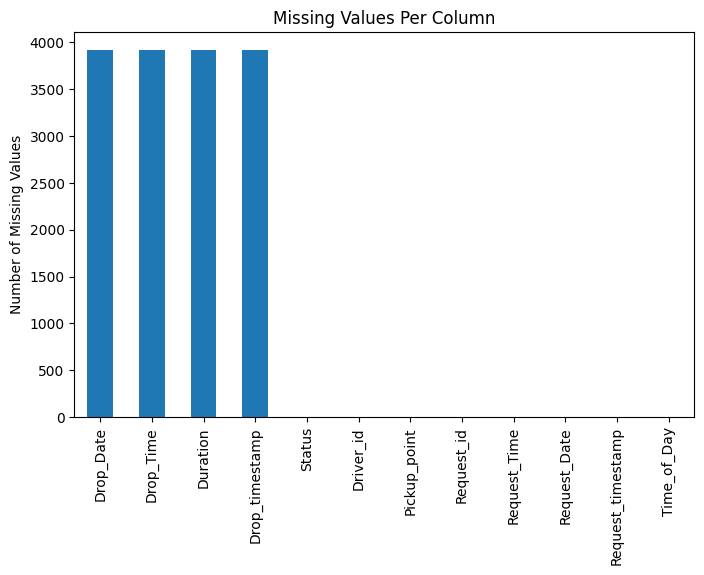

In [ ]:
#Visualizing Null Values

df.isnull().sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(8, 5), title="Missing Values Per Column")
plt.ylabel("Number of Missing Values")
plt.show()

In [ ]:
#Dataset columns
print("Number of Columns:",df.shape[1])

Number of Columns: 12


In [ ]:
#Describe Columns
print("Column Names:",df.columns.tolist())

Column Names: ['Request_id', 'Pickup_point', 'Driver_id', 'Status', 'Request_timestamp', 'Request_Date', 'Request_Time', 'Drop_timestamp', 'Drop_Date', 'Drop_Time', 'Duration', 'Time_of_Day']


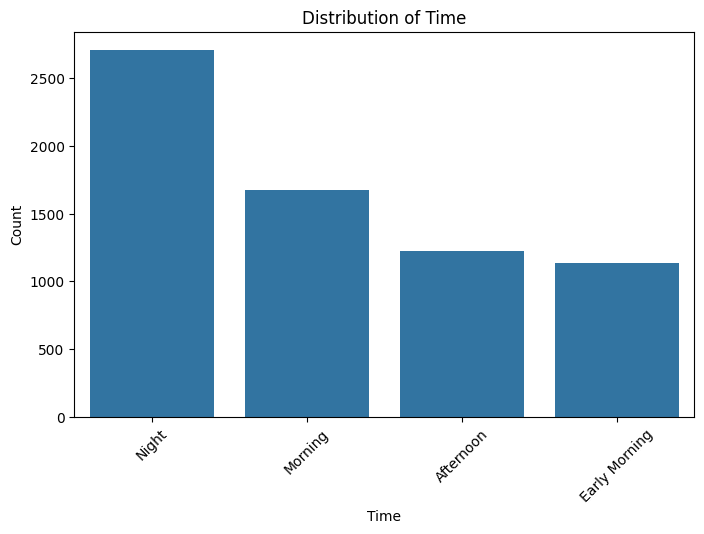

In [ ]:
#Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_of_Day', order=df['Time_of_Day'].value_counts().index)
plt.title("Distribution of Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()